In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Reading the dataset¶

In [29]:
data = pd.read_csv('./Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [30]:
# View the shape of the data (rows, columns)
print(data.shape)

(2938, 22)


# Handling missing and duplicate values

In [31]:
# Count missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


# Checking and removing duplicated rows and columns

In [32]:
# Count duplicated rows
duplicated_rows = data.duplicated().sum()
print("Number of Duplicated Rows:", duplicated_rows)

# Count duplicated columns
duplicated_columns = data.columns.duplicated().sum()
print("Number of Duplicated Columns:", duplicated_columns)

Number of Duplicated Rows: 0
Number of Duplicated Columns: 0


In [33]:
# Remove rows with any missing values
data = data.dropna()
# Remove columns with any missing values
data = data.dropna(axis=1)

In [34]:
# Impute missing values for numerical features with mean
numerical_features = data.select_dtypes(include=np.number).columns
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

# Impute missing values for nominal features with mode
nominal_features = data.select_dtypes(include='object').columns
data[nominal_features] = data[nominal_features].fillna(data[nominal_features].mode().iloc[0])

In [35]:
# Remove duplicate rows
data = data.drop_duplicates()

# Remove duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

In [36]:
# Count missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [37]:
# Count duplicated rows
duplicated_rows = data.duplicated().sum()
print("Number of Duplicated Rows:", duplicated_rows)

# Count duplicated columns
duplicated_columns = data.columns.duplicated().sum()
print("Number of Duplicated Columns:", duplicated_columns)

Number of Duplicated Rows: 0
Number of Duplicated Columns: 0


# Handling outliers

In [38]:
# Identify and handle outliers using z-score for numerical features
numerical_features = data.select_dtypes(include=np.number).columns
z_scores = np.abs(stats.zscore(data[numerical_features]))
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


# Create the feature matrix X for independent and y for dependent

In [39]:
data = data.rename(columns={'Life expectancy ': 'Life expectancy'})

X = data[['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
        'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
        'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]

y = data['Life expectancy']

# spliting to training and test set

In [40]:
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Assuming you already have X and y
numeric_columns = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
                    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
                    ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Select only numeric columns from X
X_numeric = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Standardizing and Normalizing

In [42]:
# Assuming you have X and y
numeric_columns = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
                    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
                    ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


# Select only numeric columns from X
X_numeric = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scale the numeric features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nNormalized Data:")
print(pd.DataFrame(X_train, columns=numeric_columns).head())
# Print standardized data
print("\nStandardized Data:")
print(pd.DataFrame(X_train, columns=numeric_columns).head())


Normalized Data:
       Year  Adult Mortality  infant deaths   Alcohol  percentage expenditure  \
0  0.733333         0.174905       0.002688  0.094146                0.142917   
1  0.933333         0.714829       0.072581  0.000000                0.010165   
2  0.466667         0.410646       0.155914  0.015088                0.000074   
3  0.133333         0.034221       0.010753  0.070006                0.044969   
4  0.733333         0.475285       0.067204  0.083887                0.018856   

   Hepatitis B  Measles       BMI   under-five deaths      Polio  \
0     0.810526  0.000295  0.825566            0.002169  0.680000   
1     0.915789  0.000098  0.229028            0.086768  0.840000   
2     0.852632  0.035662  0.207723            0.169197  0.800000   
3     0.936842  0.003212  0.635153            0.010846  0.960000   
4     0.747368  0.013963  0.286285            0.084599  0.706667   

   Total expenditure  Diphtheria    HIV/AIDS       GDP  Population  \
0           0.53

In [43]:
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# visualizing the dataset

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


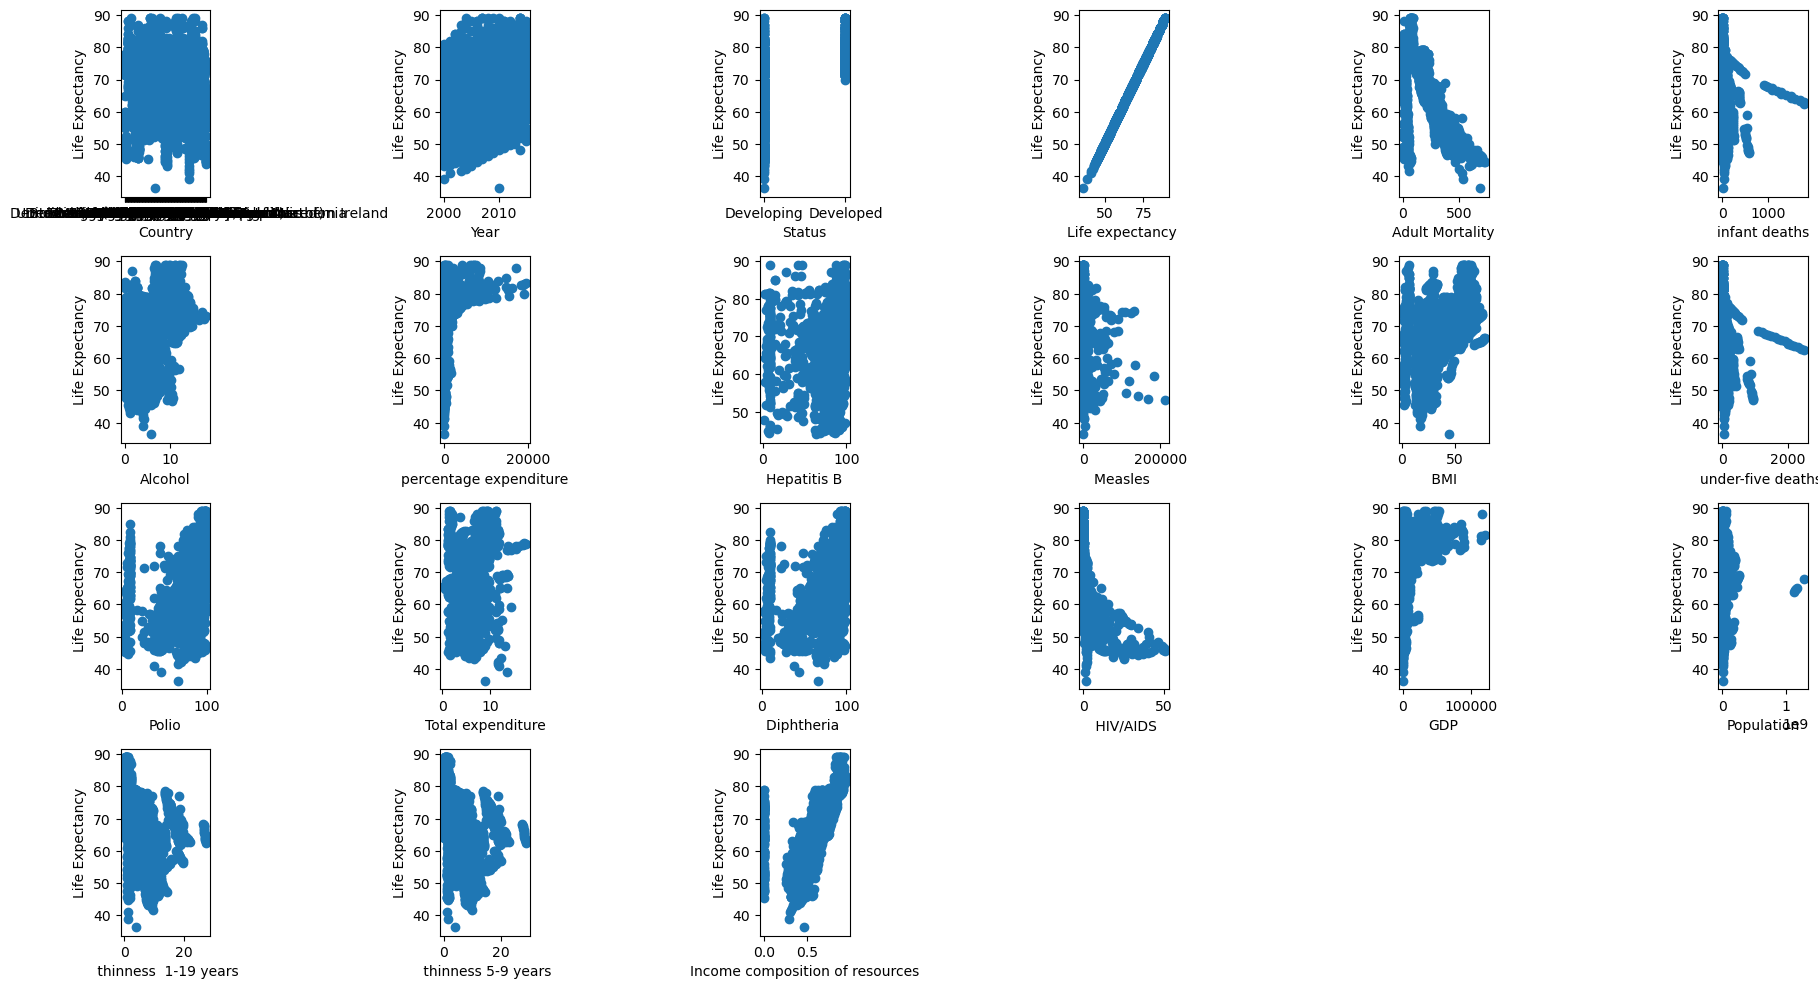

In [ ]:
# Read the dataset into a Pandas DataFrame
data = pd.read_csv('./Life Expectancy Data.csv')

# Print the list of column names
print(data.columns)

# Update the column name based on the correct name in your dataset
life_expectancy_column = 'Life expectancy '

# Scatter plots
# Determine the number of columns in the dataset
num_columns = len(data.columns[:-1])

# Calculate the number of rows and columns for subplots
num_rows = (num_columns - 1) // 6 + 1
num_cols = min(num_columns, 6)

# Create subplots based on the calculated rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 10))

# Iterate through each independent variable and create scatter plots
for i, column in enumerate(data.columns[:-1]):
    ax = axes[i // num_cols, i % num_cols]
    ax.scatter(data[column], data[life_expectancy_column])
    ax.set_xlabel(column)
    ax.set_ylabel('Life Expectancy')

# Remove any unused subplots
for j in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# Pair plots
sns.pairplot(data)
plt.show()

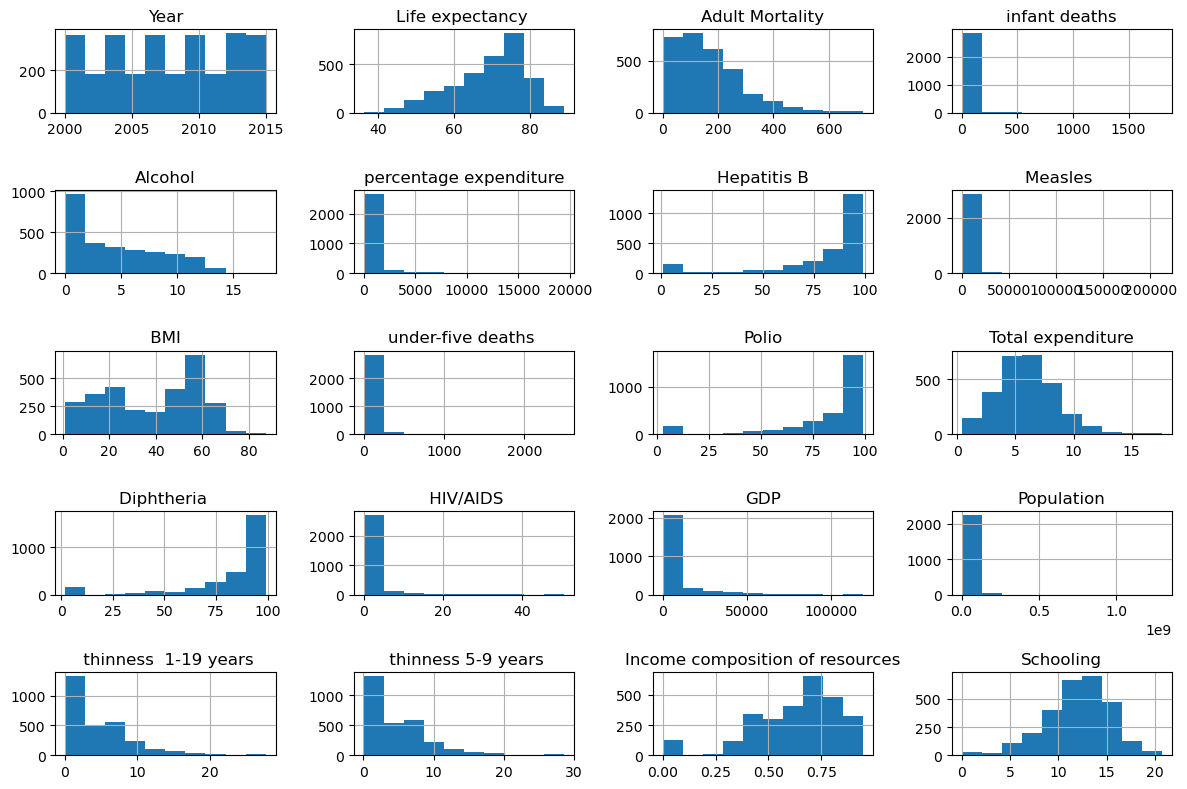

In [40]:
# Histograms
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Encoding non numeric data columns

In [44]:
encoded_data = pd.get_dummies(data.Country)
data = pd.concat([data, encoded_data], axis='columns')
data = data.drop(columns=['Country'])
encoded_data = pd.get_dummies(data.Status)
data = pd.concat([data, encoded_data], axis='columns')
data = data.drop(columns=['Status'])
data.head(10)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Turkmenistan,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Zambia,Zimbabwe,Developed,Developing
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,False,False,False,False,False,False,False,False,False,True
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,False,False,False,False,False,False,False,False,False,True
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,False,False,False,False,False,False,False,False,False,True
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,False,False,False,False,False,False,False,False,False,True
5,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,False,False,False,False,False,False,False,False,False,True
6,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,...,False,False,False,False,False,False,False,False,False,True
14,2001,55.3,316.0,88,0.01,10.574728,63.0,8762,12.6,122,...,False,False,False,False,False,False,False,False,False,True
15,2000,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,...,False,False,False,False,False,False,False,False,False,True
16,2015,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,...,False,False,False,False,False,False,False,False,False,True
17,2014,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,...,False,False,False,False,False,False,False,False,False,True


C:\Users\HP\AppData\Local\Temp\ipykernel_12456\2402101426.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


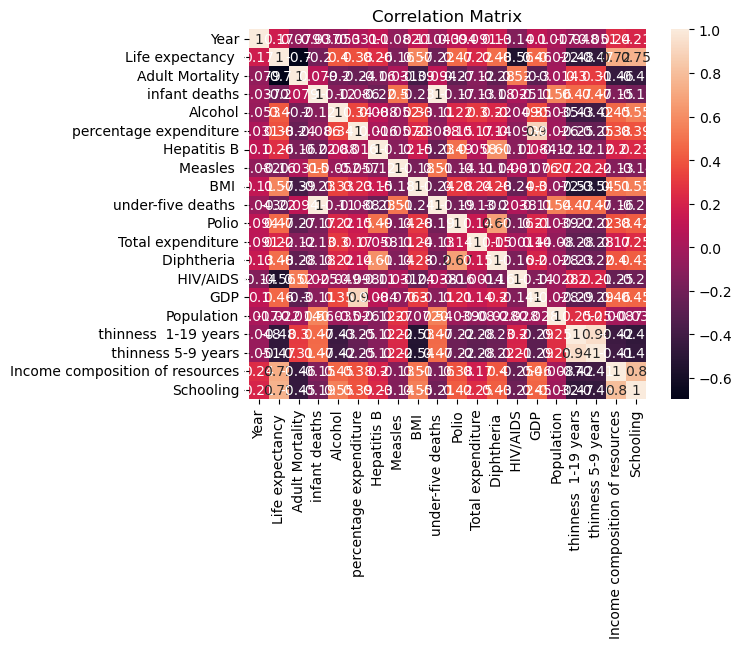

In [45]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Adding a bias term

.This step is necessary in multiple linear regression to allow the model to learn an intercept (bias) along with the coefficients for the independent variables.
Adding an intercept term is important because it accounts for the baseline value of the dependent variable when all independent variables are zero. In other words, it allows the regression line to not necessarily pass through the origin (0,0) but can have an offset or bias.

In [45]:
def add_intercept(X):
    # Add a column of ones as the constant term for the intercept in the regression model
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return X

# Initializing the coefficient(weights)

In [46]:
def initialize_coefficients(num_features):
    # Initialize coefficients with zeros
    coefficients = np.zeros(num_features)
    return coefficients
coe = initialize_coefficients(X_train.shape[1])
coe

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

# Calculating the gradient

In [47]:
def calculate_gradient(X_train, y, y_pred):
    # Calculate the gradient
    gradient = (2 / len(X_train)) * np.dot(X_train.T, (y_pred - y))
    return gradient

# Updating coefficients

In [48]:
def update_coefficients(coefficients, gradient, learning_rate):
    # Update coefficients using gradient descent
    updated_coefficients = coefficients - (learning_rate * gradient)
    return updated_coefficients

# calculate predictions

In [49]:
def calculate_predictions(X_train, coefficients):
    # Calculate predictions
    X_train = np.array(X_train)
    coefficients = np.array(coefficients)
    y_pred = np.dot(X_train, coefficients)
    return y_pred
y_pred = calculate_predictions(X_train,coe)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

# calculate mean squared error

In [50]:
def calculate_mean_squared_error(y_train, y_pred, errors = []):
    # Calculate mean squared error (MSE)
    mean_squared_error = np.mean((y_train - y_pred) ** 2)
    errors.append(mean_squared_error)
    return mean_squared_error
mean_squared_error = calculate_mean_squared_error(y_train, y_pred)
mean_squared_error

4961.502441860465

# Perform gradient decent

In [51]:
def perform_gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize coefficients
    coefficients = initialize_coefficients(X.shape[1])

    for iteration in range(num_iterations):
        # Calculate predictions
        y_pred = calculate_predictions(X, coefficients)

        # Calculate gradient
        gradient = calculate_gradient(X, y, y_pred)

        # Update coefficients
        coefficients = update_coefficients(coefficients, gradient, learning_rate)

        # Calculate mean_squared_error for monitoring convergence
        mean_squared_error = calculate_mean_squared_error(y, y_pred)
        print("Iteration {}: mean_squared_error = {:.4f}".format(iteration + 1, mean_squared_error))

    return coefficients

In [26]:
X_train, y_train
X_train = add_intercept(X_train)
print(X_train)
# Set hyperparameters
learning_rate = 0.1
num_iterations = 10000

# Perform gradient descent
coefficients = perform_gradient_descent(X_train, y_train, learning_rate, num_iterations)

# Print the coefficients
print("Coefficients:")
for i, coefficient in enumerate(coefficients):
    print("Coefficient {}: {:.4f}".format(i, coefficient))

[[1.         1.         0.73333333 ... 0.2459893  0.7444795  0.55214724]
 [1.         1.         0.93333333 ... 0.3315508  0.28391167 0.39877301]
 [1.         1.         0.46666667 ... 0.71657754 0.31230284 0.2392638 ]
 ...
 [1.         1.         0.93333333 ... 0.19251337 0.52996845 0.43558282]
 [1.         1.         0.73333333 ... 0.12299465 0.37697161 0.20245399]
 [1.         1.         0.2        ... 0.3368984  0.49369085 0.37423313]]
Iteration 1: mean_squared_error = 4961.5024
Iteration 2: mean_squared_error = 211.1890
Iteration 3: mean_squared_error = 49.8503
Iteration 4: mean_squared_error = 43.8277
Iteration 5: mean_squared_error = 43.0828
Iteration 6: mean_squared_error = 42.5369
Iteration 7: mean_squared_error = 42.0167
Iteration 8: mean_squared_error = 41.5151
Iteration 9: mean_squared_error = 41.0309
Iteration 10: mean_squared_error = 40.5629
Iteration 11: mean_squared_error = 40.1102
Iteration 12: mean_squared_error = 39.6719
Iteration 13: mean_squared_error = 39.2470
Ite

# Testing our model

In [27]:
X_test = add_intercept(X_test)
print(X_test)

[[1.         1.         0.8        ... 0.25668449 0.39116719 0.43558282]
 [1.         1.         0.26666667 ... 0.35828877 0.70977918 0.49079755]
 [1.         1.         0.86666667 ... 0.05882353 0.5126183  0.39877301]
 ...
 [1.         1.         0.73333333 ... 0.42245989 0.16719243 0.28834356]
 [1.         1.         0.         ... 0.07486631 0.60252366 0.50306748]
 [1.         1.         0.8        ... 0.05882353 0.67981073 0.55828221]]


In [28]:
# Perform gradient descent
y_pred = calculate_predictions(X_test, coefficients)
mse = calculate_mean_squared_error(y_test, y_pred)
mse

8.52563115224829

# **Comparing the model with built in function from sklearn**

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer and the linear regression model
pipeline = make_pipeline(imputer, LinearRegression())

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [53]:
# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", r2)

Mean Squared Error: 8.431098036957772
Root Mean Squared Error: 2.903635314043031
R-squared score: 0.858093622107601
